# Quality Assurance (QA) Tutorial

This notebook gives example uses of image based QA metrics in `ukat`.

We'll start with some imports and general housekeeping

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from ukat.data import fetch
from ukat.qa import snr

# Initialise output path for QA
directory = 'qa_output'
os.makedirs(directory, exist_ok=True)
OUTPUT_DIR = os.path.join(os.getcwd(), directory)

## Temporal Signal to Noise Ratio (tSNR)
Here we will use to datasets as examples of high and low tSNR. Both are FAIR ASL sequences however the high tSNR data was acquired a body coil while the low tSNR data was acquired using the receive coil built into the bore of the magnet. Additional Gaussian noise was also added to the low tSNR data.

Each dataset will be fetched, a tSNR map calculated and the output saved as a nifti. The resulting tSNR maps will also be displayed in this notebook.

(-0.5, 111.5, 111.5, -0.5)

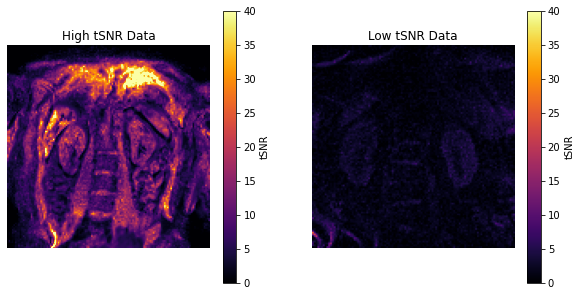

In [2]:
# Fetch data
high_tsnr_data, high_tsnr_affine = fetch.tsnr_high_philips()
# Calculate tSNR map
high_tsnr_obj = snr.Tsnr(high_tsnr_data, high_tsnr_affine)
# Save as nifti
high_tsnr_obj.to_nifti(OUTPUT_DIR, 'high_quality_data')

# Process low tSNR data in the same way
low_tsnr_data, low_tsnr_affine = fetch.tsnr_low_philips()
low_tsnr_obj = snr.Tsnr(low_tsnr_data, low_tsnr_affine)
low_tsnr_obj.to_nifti(OUTPUT_DIR, 'low_quality_data')

# Display both tSNR maps in the same figure with the same colour scale
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
im = ax1.imshow(np.rot90(high_tsnr_obj.tsnr_map[:, :, 2]), cmap='inferno', clim=(0, 40))
cb = fig.colorbar(im, ax=ax1)
cb.set_label('tSNR')
ax1.set_title('High tSNR Data')
ax1.axis('off')

im = ax2.imshow(np.rot90(low_tsnr_obj.tsnr_map[:, :, 2], -1), cmap='inferno', clim=(0, 40))
cb = fig.colorbar(im, ax=ax2)
cb.set_label('tSNR')
ax2.set_title('Low tSNR Data')
ax2.axis('off')